In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror{font-family:Consolas; font-size:17pt;}
div.output{font-size:17pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:17pt;}
div.prompt{min-width:70px;}
"""))

In [6]:
import numpy as np
import pandas as pd # read_csv, # get_dummies : 원핫인코딩
import tensorflow.keras.utils as utils  # 원핫인코딩
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

# 원핫인코딩의 방법이 2가지

In [7]:
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_y = redwine.iloc[:,-1]
print(redwine_y.unique())
redwine_y = pd.get_dummies(redwine_y).to_numpy()
redwine_y

[5 6 7 4 8 3]


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [4]:
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_y = redwine.iloc[:,-1]
print(redwine_y.unique())
redwine_y = utils.to_categorical(redwine_y)
redwine_y[:5]

[5 6 7 4 8 3]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 50ms/step - loss: 1.7751 - accuracy: 0.2470 - val_loss: 1.6894 - val_accuracy: 0.4330
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 1.6530 - accuracy: 0.4469 - val_loss: 1.5902 - val_accuracy: 0.5089
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 1.5562 - accuracy: 0.5118 - val_loss: 1.5003 - val_accuracy: 0.5179
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 1.4715 - accuracy: 0.5340 - val_loss: 1.4145 - val_accuracy: 0.5446
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 1.3881 - accuracy: 0.5359 - val_loss: 1.3310 - val_accuracy: 0.5536
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 1.3047 - accuracy: 0.5375 - val_loss: 1.2519 - val_accuracy: 0.5625
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2240 - accuracy: 0.5325 - val_loss: 1.1841 - val_accuracy: 0.

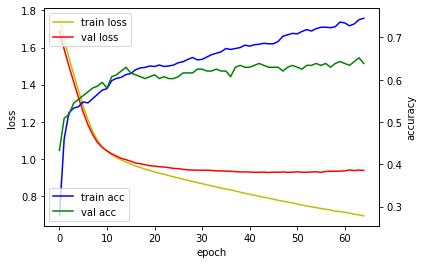

In [9]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # 6개 분류로 나눠짐
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique()) # 결과가 5 6 7 4 8 3 등급

# scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy() # 3등급의 경우 [1 0 0 0 0 0]
# redwine_y = utils.to_categorical(redwine_y) # 3등급의 경우 [0 0 0 1 0 0 0 0 0]

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#                metrics=[metrics.Recall()])
# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#                metrics=[metrics.Precision()])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [26]:
pred = np.argmax(model.predict(scaler.transform(test_X)), axis=1)+3
real = np.argmax(test_Y, axis=1)+3
ct = pd.crosstab(real, pred)
ct.index.name = "real"
ct.columns.name='predict'
ct

predict,5,6,7
real,,,
3,0,2,0
4,0,8,13
5,4,56,147
6,5,37,153
7,1,12,39
8,0,0,3


In [28]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 645us/step - loss: 0.7377 - accuracy: 0.7212
loss :  0.7377007603645325
accuracy :  0.7211796045303345


# redwine_y = utils.to_categorical(redwine_y)

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 45ms/step - loss: 2.1857 - accuracy: 0.0716 - val_loss: 2.0461 - val_accuracy: 0.1696
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 2.0071 - accuracy: 0.2066 - val_loss: 1.8883 - val_accuracy: 0.3348
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 1.8453 - accuracy: 0.3824 - val_loss: 1.7375 - val_accuracy: 0.4509
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 1.6949 - accuracy: 0.4366 - val_loss: 1.5910 - val_accuracy: 0.4732
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 1.5432 - accuracy: 0.4626 - val_loss: 1.4563 - val_accuracy: 0.4866
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 1.4253 - accuracy: 0.4772 - val_loss: 1.3415 - val_accuracy: 0.5179
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 1.3267 - accuracy: 0.5112 - val_loss: 1.2501 - val_accuracy: 0.5

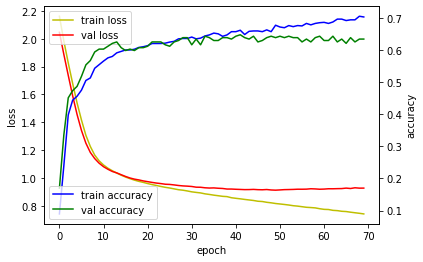

In [29]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # 6개 분류로 나눠짐
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique()) # 결과가 5 6 7 4 8 3 등급

# scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
# redwine_y = pd.get_dummies(redwine_y).to_numpy()
redwine_y = utils.to_categorical(redwine_y)

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(9, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Recall()])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Precision()])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train accuracy')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [30]:
pred = np.argmax(model.predict(scaler.transform(test_X)), axis=1)
ct = pd.crosstab(np.argmax(test_Y, axis=1), pred)
ct.index.name="real"
ct.columns.name="predict"
ct

predict,5,6
real,,
3,1,1
4,0,21
5,8,199
6,10,185
7,2,50
8,0,3


In [31]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 682us/step - loss: 0.7769 - accuracy: 0.6872
loss :  0.776943564414978
accuracy :  0.6872207522392273


# scale 조정 안 함

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 45ms/step - loss: 9.7715 - accuracy: 0.0266 - val_loss: 5.9232 - val_accuracy: 0.0268
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 5.3837 - accuracy: 0.0369 - val_loss: 3.6777 - val_accuracy: 0.0179
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 3.3651 - accuracy: 0.0157 - val_loss: 2.2334 - val_accuracy: 0.0134
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 2.0269 - accuracy: 0.0350 - val_loss: 1.6033 - val_accuracy: 0.2679
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 1.5180 - accuracy: 0.3729 - val_loss: 1.4159 - val_accuracy: 0.4554
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 1.3600 - accuracy: 0.4575 - val_loss: 1.3788 - val_accuracy: 0.3616
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 1.3166 - accuracy: 0.4041 - val_loss: 1.2944 - val_accuracy: 0.4

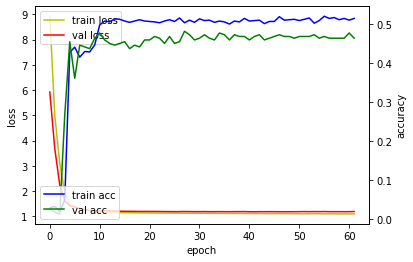

In [32]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy()
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique())
# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy()

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [33]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
import numpy as np
# 각 클래스별 확률을 출력하므로 argmax를 이용해서 가장 큰 인덱스를 값으로
pred = np.argmax(model.predict(test_X), axis=1)
ct = pd.crosstab(np.argmax(test_Y, axis=1)+3, pred+3)
ct.index.name = 'real'
ct.columns.name = 'predict'
ct

predict,5,6,7
real,,,
3,0,2,0
4,5,16,0
5,96,111,0
6,45,150,0
7,6,45,1
8,0,3,0


In [35]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 624us/step - loss: 1.1103 - accuracy: 0.5031
loss :  1.110300898551941
accuracy :  0.5031278133392334
